Task 2: Predict Future Stock Prices (Short-Term)

Objective:
Use historical stock data to predict the next day's closing price

1. Importing Required Libraries

In [14]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. Selecting Apple Stock

In [15]:
stock_symbol = 'AAPL' # or 'TSLA' for tesla

df = yf.download(stock_symbol, period = '6mo') # Load last 6 months data

print(df.head()) # display top rows

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2024-12-09  246.156204  246.645031  241.168237  241.248046  44649200
2024-12-10  247.173752  247.612695  244.749592  246.295865  36914800
2024-12-11  245.896835  250.196461  245.667378  247.363299  45205800
2024-12-12  247.363297  248.141418  245.088769  246.295864  32777500
2024-12-13  247.532883  248.690080  245.647432  247.223631  33155300


3. Features selection and label creation

In [16]:
#Use open, high, close, low, volumn to predict anext day's close

df['Next_Close'] = df['Close'].shift(-1)
df.dropna(inplace = True) #Drop last row because there is no Next_Close value
#Features (X) and Target(Y)
features = ['Open', 'High', 'Low', 'Volume']
X = df[features]
y = df['Next_Close']


4. Train/Test Split

In [17]:
from sklearn.model_selection import train_test_split
#Split data for training
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle = False)

5. Using Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

6. Predict and evaluate

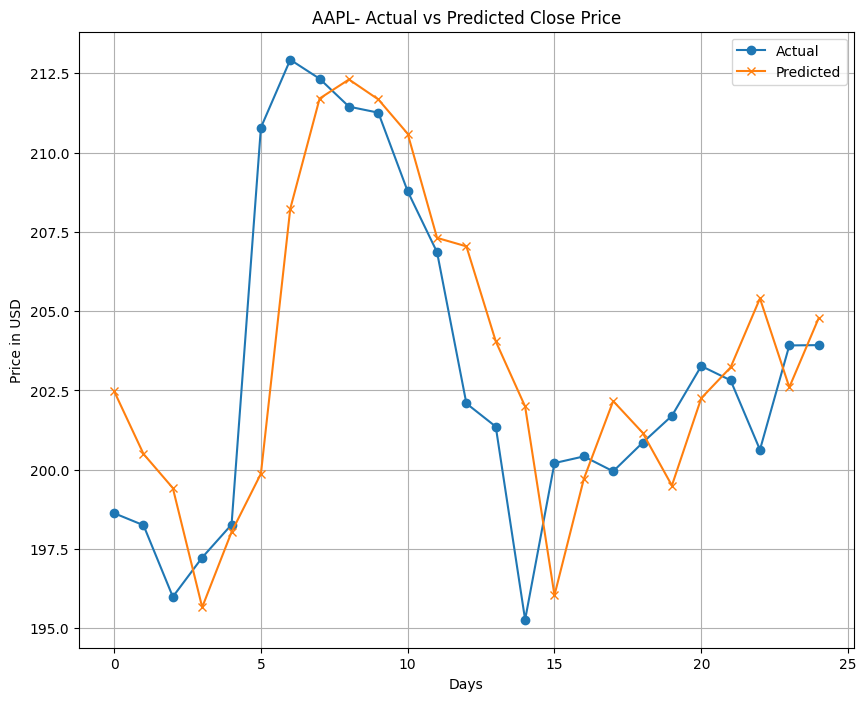

In [19]:
y_pred = model.predict(X_test)

#Plot Actual vs Predicted
plt.figure(figsize = (10,8))
plt.plot(y_test.values, label = 'Actual', marker = 'o')
plt.plot(y_pred, label= 'Predicted', marker= 'x')
plt.title(f"{stock_symbol}- Actual vs Predicted Close Price")
plt.xlabel("Days")
plt.ylabel("Price in USD")
plt.legend()
plt.grid(True)
plt.show()

7. Adding some evaluatoin metrics

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 2.5381656109483846
RMSE: 12.451609261728969
R² Score: 0.5427200135923369
